# Cognitive Algorithms - Assignment 2      
Technische Universität Berlin     
Fachgebiet Maschinelles Lernen 

**Answer the questions on Isis in 'Assignment 2 - Quiz' and copy code from this notebook where necessary.**

---

# Programming

*Please keep in mind, that we will deduct one point for each unnecessary loop.*     

In this assignment you will compare the three linear classification algorithms that you encountered in the lecture - the Perceptron, the Nearest Centroid Classifier (NCC) and the Linear Discriminant Analysis (LDA). This comparision is done on a toy data set.
Your task will be to implement LDA and use the provided code to compare the algorithms.
  
*Below you can find the provided code. Change the code only where indicated.*

---

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

plt.style.use('ggplot')

---
## Classifiers

### Task 1 - Implement LDA
Implement a linear discriminant analysis (LDA) classifer by completing the function stub ```train_lda```.
Remember how the weight $\textbf{w}$ and the bias $\beta$ are calculated for given class means $\mathbf{\bar{x}}_+,\mathbf{\bar{x}}_- \in \mathbb{R}^d$ in comparison to the NCC
\begin{align}
    \textbf{w} &= \bar{S}^{-1}(\mathbf{\bar{x}}_+ - \mathbf{\bar{x}}_-) \\
    \beta &= \frac{1}{2} \textbf{w}^T \left(\mathbf{\bar{x}}_+ + \mathbf{\bar{x}}_-\right)
        + \log\left( \frac{n_-}{n_+} \right).
\end{align}


In [3]:
def train_lda(X, Y):
    ''' Trains a linear discriminant analysis
    Definition:  w, b   = train_lda(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector
                 b       -  bias term for linear classification
    '''
    # hint: to invert a matrix you should youse np.linalg.pinv(...)
    #       instead of np.linalg.inv(...) - Why?

    # var:varience
    X1 = X[:, Y == 1]
    X2 = X[:, Y == -1]

    # Calculate the means of each class
    mean_X1 = np.mean(X1, axis=1)
    mean_X2 = np.mean(X2, axis=1)

    # Calculate the within-class scatter matrix S_W
    n1 = X1.shape[1]
    n2 = X2.shape[1]

    S_W = np.cov(X1-mean_X1[:,np.newaxis])+np.cov(X2-mean_X2[:,np.newaxis])
    print(mean_X1.shape)
    # Calculate the between-class scatter matrix S_B
    #
    #S_B = np.outer(mean_X1 - mean_X2, mean_X1 - mean_X2)
    S_B=np.cov(mean_X1-mean_X2)
    S=S_W+(n1*n2/(n1+n2))*S_B
    S_inv=np.linalg.inv(S)
   # S_W_inv=np.linalg.pinv(S_W)
    w=np.dot(S_inv,mean_X1-mean_X2)
    b=(0.5)*np.dot(w.T,mean_X1+mean_X2)+np.log(n2/n1)

    return w, b
    # Compute the LDA transformation matrix
    '''S_W_inv = np.linalg.pinv(S_W)
    transformation = np.dot(S_W_inv, S_B)

    # Compute the eigenvectors and eigenvalues of the transformation matrix
    eigenvalues, eigenvectors = np.linalg.eigh(transformation)

    # Choose the eigenvector corresponding to the largest eigenvalue as the weight vector
    indx_max = np.argmax(eigenvalues)
    w_lda = eigenvectors[:, indx_max]

    b=(0.5)*np.dot(w_lda.T,mean_X1+mean_X2)+np.log(n1/n2)
    return w_lda,b'''
    '''    S=mean_var_within_cls+(no_X1*no_X2/(no_X1+no_X2))*var_btw_clses
    S_inv=np.linalg.inv(S)
    w=-np.dot(S_inv,(X1_centered-X2_centered))
    b=1/2*(w.T@X1_centered+X2_centered)+np.log(no_X1/no_X2)
    return w, b'''

In [25]:
import numpy as np
import scipy.io as io
def train_lda(X, Y):
    ''' Trains a linear discriminant analysis
    Definition:  w, b   = train_lda(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector
                 b       -  bias term for linear classification
    '''
    # hint: to invert a matrix you should youse np.linalg.pinv(...)
    #       instead of np.linalg.inv(...) - Why?

    X1 = X[:, Y == 1]
    X2 = X[:, Y == -1]

    # Calculate the means of each class
    mean_X1 = np.mean(X1, axis=1)
    mean_X2 = np.mean(X2, axis=1)
    n1 = X1.shape[1]
    n2 = X2.shape[1]
    S=(1/(n1+n2))*(np.cov(X1-mean_X1[:,np.newaxis],rowvar=True)+np.cov(X2-mean_X2[:,np.newaxis],rowvar=True))
    S_inv=np.linalg.pinv(S)
    w=S_inv.dot(mean_X1-mean_X2)
    b=(0.5)*np.dot(w.T,mean_X1+mean_X2)+np.log(n2/n1)
    return w,b

In [5]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def train_lda(X, Y):
    x1=X[0]
    x2=X[1]
    x3=np.array(list(zip(x1,x2)))
    clf=LinearDiscriminantAnalysis()
    clf.fit(x3,Y)
    print(clf.predict)
    return clf.predict

In [6]:
def train_perceptron(X,Y,iterations=200,eta=.1):
    ''' Trains a linear perceptron
    Definition:  w, b, acc  = train_perceptron(X,Y,iterations=200,eta=.1)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
                 iter    -  optional, number of iterations, default 200
                 eta     -  optional, learning rate, default 0.1
    Output:      w       -  1D array of length D, weight vector 
                 b       -  bias term for linear classification                          
    '''
    #include the bias term by adding a row of ones to X 
    X = np.concatenate((np.ones((1,X.shape[1])), X))
    #initialize weight vector
    weights = np.ones((X.shape[0]))/X.shape[0]
    for it in np.arange(iterations):
        # indices of misclassified data
        wrong = (np.sign(weights.dot(X)) != Y).nonzero()[0]
        if wrong.shape[0] > 0:
            # pick a random misclassified data point
            m = wrong[np.random.randint(0, wrong.shape[0])]
            #update weight vector (use variable learning rate (eta/(1.+it)) )
            weights = weights  + (eta/(1.+it)) * X[:, m] * Y[m]; 
            # compute accuracy
            wrong = (np.sign(weights.dot(X)) != Y).nonzero()[0]
    b = -weights[0] 
    w = weights[1:]
    return w,b

In [7]:
def train_ncc(X,Y):
    ''' Trains a nearest centroid classifier
    Definition:  w, b = train_ncc(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector  
                 b       -  bias term for linear classification                          
    '''
    #class means
    mupos = np.mean(X[:, Y>0], axis=1)
    muneg = np.mean(X[:, Y<0], axis=1)
    
    #weight vector and bias term
    w = mupos - muneg
    w /= np.linalg.norm(w)
    b = (w.dot(mupos) + w.dot(muneg)) / 2.
    return w, b

---

## Comparison of the classifiers

In the following we provide functions to load or generate data and visualize it.

In [8]:
def generate_gaussian(N=1000, mean=None, cov=None):
    ''' Gernerate data from multivariate normal distribution
    Definition: X = generate_gaussian(N=1000)
    Input:      N - number of samples
    Output:     X - DxN array with N d-dimensional data points
    '''
    if cov is None:
        cov = np.array([[3., 1.], [1., 1.5]])
    if mean is None:
        mean = np.array([-2., 0.5])
    return np.random.multivariate_normal(mean, cov, N).T

In [9]:
def acc(out, y):
    ''' Calculate the accuracy '''
    return 50 * (np.mean(out[y > 0] > 0) + np.mean(out[y < 0] < 0))

In [10]:
def prepare_plot(func, X, Y):
    ''' visualize a binary classifier function and return training accuracy '''
    
    mean_tar = np.mean(X[:, Y>0], axis=1)
    mean_non = np.mean(X[:, Y<0], axis=1)
    
    w, b = func(X, Y)
    
    # plot data points
    kwargs = {'s': 16, 'alpha': 0.5}
    plt.scatter(X[0, Y>0], X[1, Y>0], label='class $o$', **kwargs)
    plt.scatter(X[0, Y<0], X[1, Y<0], label='class $\Delta$', **kwargs)

    kwargs = {'s': 30, 'color': 'black'}
    plt.scatter([mean_tar[0], mean_non[0]], [mean_tar[1], mean_non[1]], **kwargs)

    # calculate decision boundary
    R = np.array([[0, -1], [1, 0]])
    w_orth = R.dot(w)
    m = w_orth[1] / w_orth[0]
    n = b / w[1]
    t = np.linspace(-10, 10, 100)
    y_t = m * t + n
    
    # plot boundary
    plt.plot(t, y_t, 'y', label='decision boundary')
    
    # plot axis settings
    plt.xlim(-7, 7)
    plt.ylim(-7, 7)
    
    # plot labeling
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend(loc='upper left')
    
    return acc(w.T.dot(X)-b, Y)

In [11]:
def train_lda(X, Y):
    ''' Trains a linear discriminant analysis
    Definition:  w, b   = train_lda(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector
                 b       -  bias term for linear classification
    '''
    # hint: to invert a matrix you should youse np.linalg.pinv(...)
    #       instead of np.linalg.inv(...) - Why?


In [12]:
def compare_classifiers():
    '''For testing purposes'''
    
    # number of samples for test and training purposes
    Ntr = 1000
    
    # prepare data
    mean_tar = np.array([-1., .5])
    mean_non = np.array([2., -1.])
    
    np.random.seed(280220)
    X_tar = generate_gaussian(N=Ntr, mean=mean_tar)
    X_non = generate_gaussian(N=Ntr, mean=mean_non)
    np.random.seed()
    y_tar = np.ones(X_tar.shape[1])
    y_non = -np.ones(X_non.shape[1])
    
    X = np.concatenate((X_tar, X_non), axis=1)
    Y = np.concatenate((y_tar, y_non))
    
    plt.figure(figsize=(6, 18))

    plt.subplot(3, 1, 1)
    plt.title(f"Perceptron - accuracy={round(prepare_plot(train_perceptron, X, Y))}%")
    
    plt.subplot(3, 1, 2)
    plt.title(f"NCC - accuracy={round(prepare_plot(train_ncc, X, Y))}%")

    plt.subplot(3, 1, 3)
    plt.title(f"LDA - accuracy={round(prepare_plot(train_lda, X, Y))}%")
    
    plt.show()

### Task 2 - Run compare_classifiers

Test your LDA implementation with the provided function ```compare_classifiers```. It generates a 2D toy data set and plots the resulting separating hyperplanes for the three linear classification methods.

You can execute the cell with Ctrl+Return serveral times several times in a row.<br>
Keep track of the classification boundaries. How do they change in every iteration?

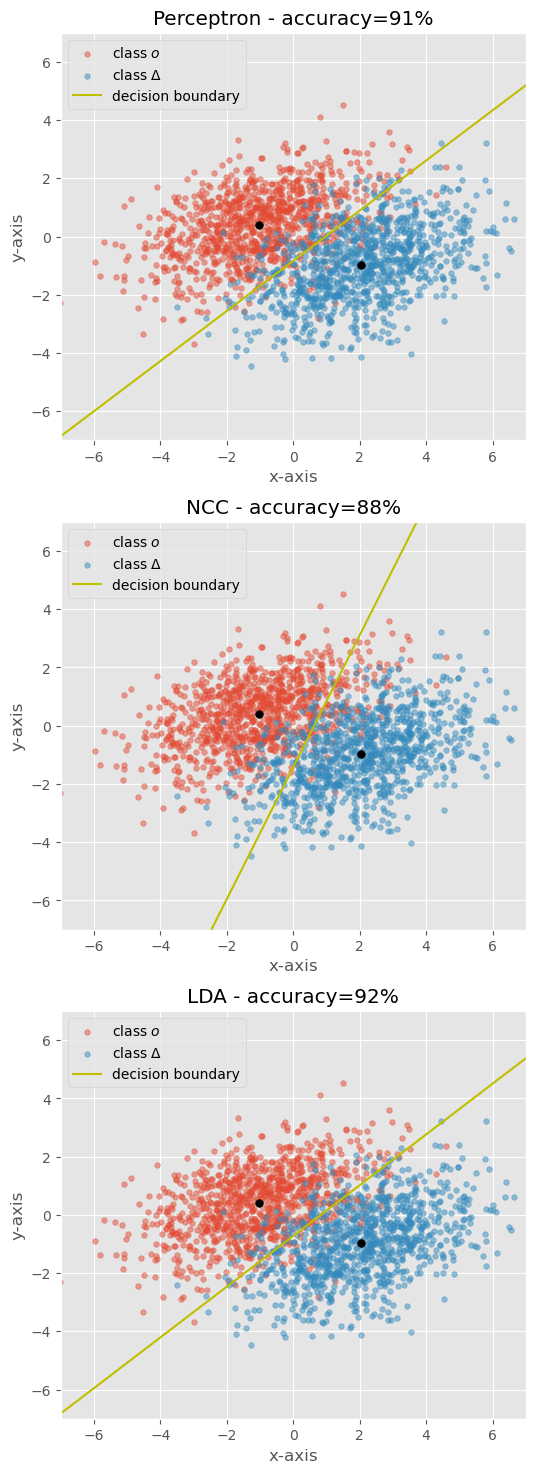

In [60]:
compare_classifiers()

### Task 3 - Modify LDA (optional)
Remove the log term of your LDA function and compare it with the previous output.

In [ ]:
import numpy as np
import scipy.io as io
def train_lda(X, Y):
    ''' Trains a linear discriminant analysis
    Definition:  w, b   = train_lda(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector
                 b       -  bias term for linear classification
    '''
    # hint: to invert a matrix you should youse np.linalg.pinv(...)
    #       instead of np.linalg.inv(...) - Why?

    X1 = X[:, Y == 1]
    X2 = X[:, Y == -1]

    # Calculate the means of each class
    mean_X1 = np.mean(X1, axis=1)
    mean_X2 = np.mean(X2, axis=1)

    # Calculate the within-class scatter matrix S_W
    n1 = X1.shape[1]
    n2 = X2.shape[1]
    S=(n1*n2/(n1+n2))*(np.cov(X1)+np.cov(X2))
    S_inv=np.linalg.inv(S)
  
    w=np.dot(S_inv,mean_X1-mean_X2)
    b=(0.5)*np.dot(w.T,mean_X1+mean_X2)+np.log(n1/n2)
    return w,b


In [27]:

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])

# Compute the covariance matrix
covariance_matrix = np.cov(x, y)

print("Covariance matrix:")
print(covariance_matrix)

Covariance matrix:
[[ 2.5 -2.5]
 [-2.5  2.5]]


In [54]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])
c=np.dot(x.reshape(-1,1).T-np.mean(x).reshape(1,1),x.reshape(-1,1)-np.mean(x).reshape(1,1))
print(c)
print(x.reshape(-1,1).shape)
print(x.reshape(-1,1))
print(x.reshape(-1,1).T)
print(x.reshape(-1,1).T.shape)
print(np.inner(x,y))

[[10.]]
(5, 1)
[[1]
 [2]
 [3]
 [4]
 [5]]
[[1 2 3 4 5]]
(1, 5)
35


In [47]:
5+8+9+8+5


35

In [53]:
np.cov(x,x)

array([[2.5, 2.5],
       [2.5, 2.5]])

In [59]:
import numpy as np
import scipy.io as io
def train_lda(X, Y):
    ''' Trains a linear discriminant analysis
    Definition:  w, b   = train_lda(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector
                 b       -  bias term for linear classification
    '''
    # hint: to invert a matrix you should youse np.linalg.pinv(...)
    #       instead of np.linalg.inv(...) - Why?

    X1 = X[:, Y == 1]
    X2 = X[:, Y == -1]

    # Calculate the means of each class
    mean_X1 = np.mean(X1, axis=1)
    mean_X2 = np.mean(X2, axis=1)

   
    n1 = X1.shape[1]
    n2 = X2.shape[1]
    S=(1/(n1+n2))*((n1-1)*np.cov(X1)+(n2-1)*np.cov(X2))
    S_inv=np.linalg.pinv(S)
  
    w=np.dot(S_inv,mean_X1-mean_X2)
    b=(0.5)*np.dot(w.T,mean_X1+mean_X2)
    return w,b